# 目標

連続力学系における不動点について知る


# 常微分方程式によって記述される力学系の不動点

<div style="border-radius: 0.5rem; border:solid 0.01rem; background-color: rgba(192, 160, 255 , 0.2); padding:1rem 1rem 0rem 1rem" >
<div style="border-bottom: solid 0.01rem; margin:0 0 0.5rem 0">

**定義**: (微分方程式の不動点)[[1](#footnote1)]

</div>
<div>

自励的な微分方程式 $\dot{\boldsymbol{x}} = f(\boldsymbol{x})$ の定数解を方程式の**不動点**(**平衡点**)という．

</div>
</div>

<br />

<div class="def" style="border-radius: 0.5rem; border:solid 0.01rem; background-color: rgba(0, 160, 255 , 0.2); padding:1rem 1rem 0rem 1rem" >
<div style="border-bottom: solid 0.01rem; margin:0 0 0.5rem 0" id="ex1">

**具体例**: (微分方程式の不動点)

</div>
<div>

ロジスティック方程式 $\dot{x} = ax(1-\frac{x}{N})$ の $a\neq 0$ における定数解は
$x = 0, N$ であり，これが微分方程式の不動点である．

</div>
</div>

微分方程式の平衡点は $\dot{x} = 0$ を満たし，これは時間が変化しても状態が変化しないことを表す．
すなわち，離散力学系における[不動点](./fixed_point.ipynb)
は連続力学系における不動点である．

以下にロジスティック方程式 $\dot{x} = ax(1-x)$
の不動点 $0, 1$ とその付近を初期値とした数値解の挙動を示す．


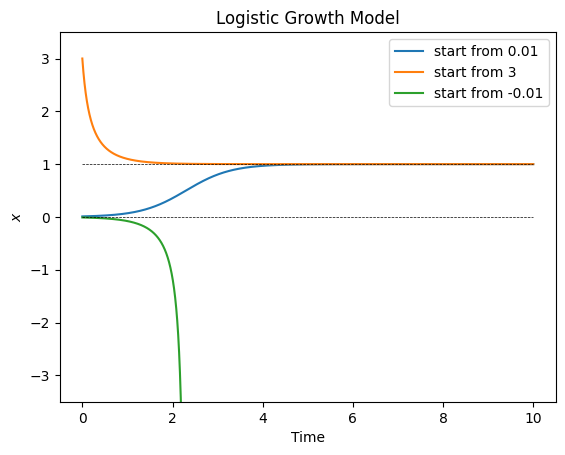

In [9]:
import matplotlib.pyplot as plt
from model.logistic_growth import SequentialLogisticGrowth

# a = 2.0 での f(x)
m = SequentialLogisticGrowth(2.0)

# 初期値
x_1_init: float = 0.01
x_2_init: float = 3.00
x_3_init: float = -0.01

dt = 0.001
end = 10

# バクテリアの個体数のリスト
X_1, _ = m.simulate(x_1_init, dt, end)
X_2, _ = m.simulate(x_2_init, dt, end)
X_3, T = m.simulate(x_3_init, dt, end)


# プロット
plt.plot(T, X_1[0], label="start from 0.01")
plt.plot(T, X_2[0], label="start from 3")
plt.plot(T, X_3[0], label="start from -0.01")
plt.plot([0, 10], [1, 1], color="black", linestyle="--", linewidth=0.5)
plt.plot([0, 10], [0, 0], color="black", linestyle="--", linewidth=0.5)
plt.title("Logistic Growth Model")
plt.xlabel("Time")
plt.ylabel("$x$")
plt.ylim(-3.5, 3.5)
plt.legend()
plt.show()

上の図を見ると， 0.01 や 3 を初期値とする解は $x = 1$ に漸近し，
-0.01 を初期値とする解は有限時間で発散していることがわかる．

<div style="border-radius: 0.5rem; border:solid 0.01rem; background-color: rgba(192, 160, 255 , 0.2); padding:1rem 1rem 0rem 1rem" >
<div style="border-bottom: solid 0.01rem; margin:0 0 0.5rem 0">

**少し曖昧な定義**: (沈点，源点)[[1](#footnote1)]

</div>
<div>

不動点付近を初期値とする軌道が，不動点に収束するときこれを**沈点**という．

不動点付近を初期値とする軌道が，不動点から離れるときこれを**源点**という．

</div>
</div>

これは離散力学系における
沈点や原点の定義と近しいものである．

<div class="def" style="border-radius: 0.5rem; border:solid 0.01rem; background-color: rgba(0, 160, 255 , 0.2); padding:1rem 1rem 0rem 1rem" >
<div style="border-bottom: solid 0.01rem; margin:0 0 0.5rem 0" id="ex1">

**具体例**: (微分方程式の沈点と源点)

</div>
<div>

ロジスティック方程式 $\dot{x} = ax(1-x)$ の
不動点は $x = 0, 1$
であり，
$x=0$ は源点，
$x=1$ は沈点である．

</div>
</div>


## 安定性

離散力学系の不動点と同じでこれも吸引とリヤプノフ安定と二つの概念がある．

<div style="border-radius: 0.5rem; border:solid 0.01rem; background-color: rgba(192, 160, 255 , 0.2); padding:1rem 1rem 0rem 1rem" >
<div style="border-bottom: solid 0.01rem; margin:0 0 0.5rem 0">

**定義**: (吸引的)[[2](#footnote2)]

</div>
<div>

不動点 $\boldsymbol{p}$ ，
ある $\delta$ が存在し， $|\boldsymbol{x} - \boldsymbol{p}| < \delta$
ならば
$t \rightarrow \infty$
で $\boldsymbol{x}$ が $\boldsymbol{p}$ に収束するとき，
$\boldsymbol{p}$ を**吸引的**という．

</div>
</div>

<br />

<div style="border-radius: 0.5rem; border:solid 0.01rem; background-color: rgba(192, 160, 255 , 0.2); padding:1rem 1rem 0rem 1rem" >
<div style="border-bottom: solid 0.01rem; margin:0 0 0.5rem 0">

**定義**: (リヤプノフ安定)[[1](#footnote1)]

</div>
<div>

不動点 $\boldsymbol{p}$ の近傍 $N$ に対して， $N$ に含まれる $\boldsymbol{p}$ の近傍 $N_1$ が存在し，
$N_1$ に属するそれぞれの
初期値 $\boldsymbol{x}_0$
に対して，
$t \geq 0$ における全ての
軌道が $N$ に含まれるとき，
$\boldsymbol{p}$ を**リヤプノフ安定**という．

</div>
</div>


<a id="footnote1">1</a>: K.T. アリグッド, T.D. サウアー, J.A. ヨーク著, 星野高志ほか訳『カオス : 力学系入門』(Chaos: Introduction to Dynamical Systems), シュプリンガー・ジャパン, 東京, Japan, 2006.12-2007.4, ISBN: 978-4-431-71236-7 [4431712364].

<a id="footnote2">2</a>: C. ロビンソン著, 國府寛司, 柴山健伸, 岡宏枝訳, 力学系, シュプリンガー・フェアラーク東京, 東京, Japan, 2001.12
ISBN: 9784431708254 [4431708251] (上), 9784431708261 [443170826X] (下).
